# Modelling and Evaluation

## Objectives

* Create an ML model that can diferentiate between the 100 species of butterflies and moths within the dataset.

## Inputs

* inputs/butterfly_moth/images/test
* inputs/butterfly_moth/images/validation
* inputs/butterfly_moth/images/train

## Outputs

* Create ML model for training.
* Save the model.
* Various visual representations of model performance.

## Additional Comments

* No comments.



---

## Library Imports and Working Directory Change

In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import itertools
import random
import numpy as np
import plotly.express as px
import joblib
import tensorflow as tf
from tensorflow import keras
from matplotlib.image import imread
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, MaxPool2D, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import load_model
from tensorflow.keras.models import load_model
from PIL import Image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

sns.set_style('white')

In [2]:
cwd = os.getcwd()
cwd

'/workspace/portfolio-project-5/jupyter_notebooks'

In [3]:
os.chdir('/workspace/portfolio-project-5/')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/portfolio-project-5'

Import image shape.

In [5]:
version = 'v1'
image_shape = joblib.load(filename=f'outputs/{version}/image_shape.pkl')
image_shape

(224, 224, 3)

---

# Set Directories

## Input

Set train, validation and test paths.

In [6]:
img_data_dir = 'inputs/butterfly_moth/images'
train_path = img_data_dir + '/train'
test_path = img_data_dir + '/test'
validation_path = img_data_dir + '/validation'

## Output

In [7]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


Set label name.

In [8]:
labels = os.listdir(train_path)
print(f'Labels: {labels}')

Labels: ['adonis', 'african_giant_swallowtail', 'american_snoot', 'an_88', 'appollo', 'arcigera_flower_moth', 'atala', 'atlas_moth', 'banded_orange_heliconian', 'banded_peacock', 'banded_tiger_moth', 'beckers_white', 'bird_cherry_ermine_moth', 'black_hairstreak', 'blue_morpho', 'blue_spotted_crow', 'brookes_birdwing', 'brown_argus', 'brown_siproeta', 'cabbage_white', 'cairns_birdwing', 'chalk_hill_blue', 'checquered_skipper', 'chestnut', 'cinnabar_moth', 'clearwing_moth', 'cleopatra', 'clodius_parnassian', 'clouded_sulphur', 'comet_moth', 'common_banded_awl', 'common_wood-nymph', 'copper_tail', 'crecent', 'crimson_patch', 'danaid_eggfly', 'eastern_coma', 'eastern_dapple_white', 'eastern_pine_elfin', 'elbowed_pierrot', 'emperor_gum_moth', 'garden_tiger_moth', 'giant_leopard_moth', 'glittering_sapphire', 'gold_banded', 'great_eggfly', 'great_jay', 'green_celled_cattleheart', 'green_hairstreak', 'grey_hairstreak', 'hercules_moth', 'humming_bird_hawk_moth', 'indra_swallow', 'io_moth', 'iph

---

# Dataset Breakdown

I will first collate and plot the distribution of train, test and validation images.

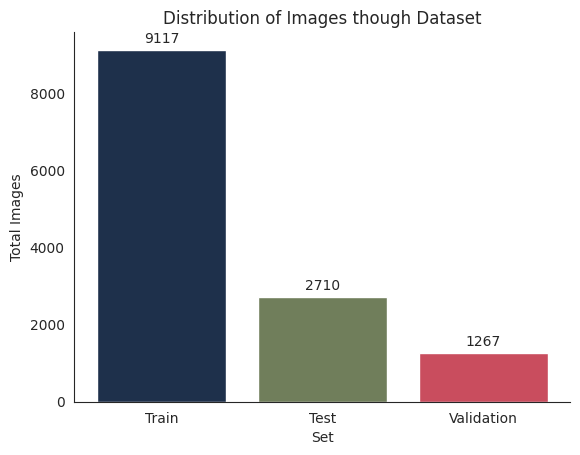

In [10]:
def collate_dataset(img_data_dir):
    counts = {}
    for folder in os.listdir(img_data_dir):
        folder_path = os.path.join(img_data_dir, folder)
        if os.path.isdir(folder_path):
            num_of_img = sum([len(files) for r, d, files in os.walk(folder_path)])
            counts[folder] = num_of_img
    return counts

num_of_train = collate_dataset(train_path)
num_of_test = collate_dataset(test_path)
num_of_validation = collate_dataset(validation_path)

all_counts = {
    'Train': sum(num_of_train.values()),
    'Test': sum(num_of_test.values()),
    'Validation': sum(num_of_validation.values())
}

fig, axes = plt.subplots()
bars = axes.bar(all_counts.keys(), all_counts.values(), color=['#1E304B', '#707E5B', '#C94D5E'])

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

for bar in bars:
    height = bar.get_height()
    axes.annotate('{}'.format(height),
    xy=(bar.get_x() + bar.get_width() / 2, height),
    xytext=(0, 3),
    textcoords='offset points',
    ha='center',
    va='bottom')

plt.title('Distribution of Images though Dataset')
plt.xlabel('Set')
plt.ylabel('Total Images')
plt.savefig(f'{file_path}/dataset_breakdown.png',
            bbox_inches='tight', dpi=150)
plt.show()



### Test, Train and Validation Sets

In [9]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                   width_shift_range=0.10, 
                                   height_shift_range=0.10,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   rescale=1./255
                              )

In [10]:
batch_size = 40
train_set = augmented_image_data.flow_from_directory(
    train_path,
    color_mode = 'rgb',
    target_size = image_shape[:2],
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True
)

train_set.class_indices

Found 9117 images belonging to 100 classes.


{'adonis': 0,
 'african_giant_swallowtail': 1,
 'american_snoot': 2,
 'an_88': 3,
 'appollo': 4,
 'arcigera_flower_moth': 5,
 'atala': 6,
 'atlas_moth': 7,
 'banded_orange_heliconian': 8,
 'banded_peacock': 9,
 'banded_tiger_moth': 10,
 'beckers_white': 11,
 'bird_cherry_ermine_moth': 12,
 'black_hairstreak': 13,
 'blue_morpho': 14,
 'blue_spotted_crow': 15,
 'brookes_birdwing': 16,
 'brown_argus': 17,
 'brown_siproeta': 18,
 'cabbage_white': 19,
 'cairns_birdwing': 20,
 'chalk_hill_blue': 21,
 'checquered_skipper': 22,
 'chestnut': 23,
 'cinnabar_moth': 24,
 'clearwing_moth': 25,
 'cleopatra': 26,
 'clodius_parnassian': 27,
 'clouded_sulphur': 28,
 'comet_moth': 29,
 'common_banded_awl': 30,
 'common_wood-nymph': 31,
 'copper_tail': 32,
 'crecent': 33,
 'crimson_patch': 34,
 'danaid_eggfly': 35,
 'eastern_coma': 36,
 'eastern_dapple_white': 37,
 'eastern_pine_elfin': 38,
 'elbowed_pierrot': 39,
 'emperor_gum_moth': 40,
 'garden_tiger_moth': 41,
 'giant_leopard_moth': 42,
 'glittering_

In [11]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    validation_path,
    color_mode = 'rgb',
    target_size = image_shape[:2],
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True
)

validation_set.class_indices

Found 1267 images belonging to 100 classes.


{'adonis': 0,
 'african_giant_swallowtail': 1,
 'american_snoot': 2,
 'an_88': 3,
 'appollo': 4,
 'arcigera_flower_moth': 5,
 'atala': 6,
 'atlas_moth': 7,
 'banded_orange_heliconian': 8,
 'banded_peacock': 9,
 'banded_tiger_moth': 10,
 'beckers_white': 11,
 'bird_cherry_ermine_moth': 12,
 'black_hairstreak': 13,
 'blue_morpho': 14,
 'blue_spotted_crow': 15,
 'brookes_birdwing': 16,
 'brown_argus': 17,
 'brown_siproeta': 18,
 'cabbage_white': 19,
 'cairns_birdwing': 20,
 'chalk_hill_blue': 21,
 'checquered_skipper': 22,
 'chestnut': 23,
 'cinnabar_moth': 24,
 'clearwing_moth': 25,
 'cleopatra': 26,
 'clodius_parnassian': 27,
 'clouded_sulphur': 28,
 'comet_moth': 29,
 'common_banded_awl': 30,
 'common_wood-nymph': 31,
 'copper_tail': 32,
 'crecent': 33,
 'crimson_patch': 34,
 'danaid_eggfly': 35,
 'eastern_coma': 36,
 'eastern_dapple_white': 37,
 'eastern_pine_elfin': 38,
 'elbowed_pierrot': 39,
 'emperor_gum_moth': 40,
 'garden_tiger_moth': 41,
 'giant_leopard_moth': 42,
 'glittering_

In [12]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    color_mode = 'rgb',
    target_size = image_shape[:2],
    class_mode = 'categorical',
    batch_size = batch_size,
    shuffle = True
)

test_set.class_indices

Found 2710 images belonging to 100 classes.


{'adonis': 0,
 'african_giant_swallowtail': 1,
 'american_snoot': 2,
 'an_88': 3,
 'appollo': 4,
 'arcigera_flower_moth': 5,
 'atala': 6,
 'atlas_moth': 7,
 'banded_orange_heliconian': 8,
 'banded_peacock': 9,
 'banded_tiger_moth': 10,
 'beckers_white': 11,
 'bird_cherry_ermine_moth': 12,
 'black_hairstreak': 13,
 'blue_morpho': 14,
 'blue_spotted_crow': 15,
 'brookes_birdwing': 16,
 'brown_argus': 17,
 'brown_siproeta': 18,
 'cabbage_white': 19,
 'cairns_birdwing': 20,
 'chalk_hill_blue': 21,
 'checquered_skipper': 22,
 'chestnut': 23,
 'cinnabar_moth': 24,
 'clearwing_moth': 25,
 'cleopatra': 26,
 'clodius_parnassian': 27,
 'clouded_sulphur': 28,
 'comet_moth': 29,
 'common_banded_awl': 30,
 'common_wood-nymph': 31,
 'copper_tail': 32,
 'crecent': 33,
 'crimson_patch': 34,
 'danaid_eggfly': 35,
 'eastern_coma': 36,
 'eastern_dapple_white': 37,
 'eastern_pine_elfin': 38,
 'elbowed_pierrot': 39,
 'emperor_gum_moth': 40,
 'garden_tiger_moth': 41,
 'giant_leopard_moth': 42,
 'glittering_

### Save Class Indices

In [13]:
joblib.dump(
    value = train_set.class_indices,
    filename = f'{file_path}/class_indices.pkl'
)

['outputs/v1/class_indices.pkl']

---

# Model Creation

In [16]:
def create_ml_model():

    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))

    model.add(Dense(100, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


### Model Summary

In [17]:
create_ml_model().summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       7

### Early Stopping Callback

In [18]:
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, mode='max')

### Fitting the Model

In [20]:
model = create_ml_model()

model.fit(
    train_set,
    epochs = 45,
    steps_per_epoch = len(train_set.classes) // batch_size,
    validation_data = validation_set,
    callbacks = [early_stop],
    verbose = 1
)

2024-03-28 02:05:04.090487: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/45


227/227 [==============================] - 340s 1s/step - loss: 4.4774 - accuracy: 0.0207 - val_loss: 4.1686 - val_accuracy: 0.0395
Epoch 2/45
227/227 [==============================] - 341s 2s/step - loss: 4.0808 - accuracy: 0.0484 - val_loss: 3.6889 - val_accuracy: 0.0923
Epoch 3/45
227/227 [==============================] - 342s 2s/step - loss: 3.6900 - accuracy: 0.0931 - val_loss: 3.1922 - val_accuracy: 0.2060
Epoch 4/45
227/227 [==============================] - 352s 2s/step - loss: 3.3498 - accuracy: 0.1537 - val_loss: 2.8253 - val_accuracy: 0.2731
Epoch 5/45
227/227 [==============================] - 349s 2s/step - loss: 2.9579 - accuracy: 0.2258 - val_loss: 2.4197 - val_accuracy: 0.3867
Epoch 6/45
227/227 [==============================] - 358s 2s/step - loss: 2.6846 - accuracy: 0.2894 - val_loss: 2.3073 - val_accuracy: 0.3923
Epoch 7/45
227/227 [==============================] - 374s 2s/step - loss: 2.4741 - accuracy: 0.3268 - val_loss: 1.9693 - val_accuracy: 0.4751
Epoch 8/45

### Save the Model

In [44]:
model.save('outputs/v1/butterfly_moth_classification_final.h5')

---

# Model Performance

### Model Learning Curve

In [26]:
model = load_model('outputs/v1/butterfly_moth_classification_final.h5')

In [27]:
type(model)

keras.engine.sequential.Sequential

In [29]:
history = pd.DataFrame(model.history.history)
history.head()

TypeError: 'NoneType' object is not subscriptable

In [54]:
sns.set_style('whitegrid')
history[['loss', 'val_loss']].plot(style='.-')
plt.title('Loss')
plt.show()

print('\n')

sns.set_style('whitegrid')
history[['accuracy', 'val_accuracy']].plot(style='.-')
plt.title('Accuracy')
plt.savefig(f'{file_path}/model_eval.png',
            bbox_inches='tight', dpi=150)
plt.show()

KeyError: "None of [Index(['loss', 'val_loss'], dtype='object')] are in the [columns]"

Conclusion:
- The model neither under or over fit, but learned the data normally.

---

# Model Evaluation

Load model.

In [16]:
model = load_model('outputs/v1/butterfly_moth_classification_final.h5')

Evaluate model on the test set.

In [52]:
model_eval = model.evaluate(test_set)
print('Model Accuracy: {:2f}%'.format(model_eval[1] * 100))

 2/68 [..............................] - ETA: 46s - loss: 1.1337 - accuracy: 0.7000 

68/68 [==============================] - 26s 380ms/step - loss: 0.8551 - accuracy: 0.7731
Model Accuracy: 77.306271%


Save evaluation.

In [29]:
joblib.dump(value=model_eval, filename='outputs/v1/model_evaluation.pkl')

['outputs/v1/model_evaluation.pkl']

---

# Predict On New Data

Load test image.

zebra_long_wing


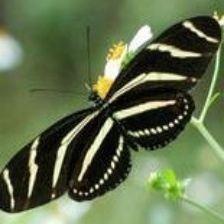

In [23]:
label = labels[99] 

pointer = 0
pil_img = image.load_img(
    test_path + '/' + label + '/' + os.listdir(test_path + '/' + label)[pointer],
    target_size = image_shape,
    color_mode = 'rgb'
)

print(label)
pil_img

Convert image to array.

In [24]:
img_array = image.img_to_array(pil_img)
img_array = np.expand_dims(img_array, axis=0)/255

print(img_array.shape)

(1, 224, 224, 3)


Predict the class the image belongs to.

In [25]:
predict_probabilities = model.predict(img_array)
highest_prob = np.argmax(predict_probabilities, axis=1)

prediction_index = highest_prob[0]
prediction_class = labels[prediction_index]

prediction_value = predict_probabilities[0,prediction_index]



print(f'Predicted Class: {prediction_class}')
print(f'Predicttion Score: {round(prediction_value * 100, 2)}%')

Predicted Class: zebra_long_wing
Predicttion Score: 99.98%


---